In [90]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
# For pandas profiling


## Load and Explore the Data

In [19]:
data = pd.read_csv('tou.csv')

In [20]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [21]:
df= data #making a copy to avoid changes to data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
#checking the shape of the dataset
np.random.seed(15) 
df.sample(10) #loading random 10 rows

There are 4888 rows and 20 columns.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4019,204019,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Married,NaN,0,1,0,2.0,VP,37522.0
1365,201365,1,29.0,Company Invited,3,30.0,Large Business,Male,2,1.0,Basic,5.0,Single,2.0,0,3,1,1.0,Executive,16091.0
473,200473,0,49.0,Self Enquiry,1,24.0,Salaried,Male,2,4.0,King,3.0,Married,2.0,1,3,0,1.0,VP,34502.0
2554,202554,0,52.0,Company Invited,1,7.0,Small Business,Fe Male,2,5.0,Standard,5.0,Unmarried,5.0,0,2,1,1.0,Senior Manager,26162.0
1492,201492,0,34.0,Self Enquiry,1,13.0,Salaried,Fe Male,2,3.0,Standard,4.0,Unmarried,1.0,0,5,0,0.0,Senior Manager,26994.0
3809,203809,1,30.0,Company Invited,3,NaN,Large Business,Male,3,2.0,Basic,5.0,Single,3.0,0,3,1,2.0,Executive,19769.0
4385,204385,0,39.0,Self Enquiry,1,17.0,Small Business,Female,4,4.0,Deluxe,3.0,Married,5.0,0,3,0,2.0,Manager,28502.0
521,200521,0,27.0,Company Invited,3,NaN,Small Business,Female,3,2.0,Deluxe,3.0,Married,2.0,1,2,1,2.0,Manager,19647.0
4358,204358,0,49.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,Deluxe,3.0,Married,4.0,0,5,1,1.0,Manager,22729.0
475,200475,0,26.0,Self Enquiry,3,34.0,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,3,1,0.0,Manager,21272.0


In [22]:
df.info() # looking at the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [23]:
df.ProdTaken.unique()

array([1, 0], dtype=int64)

## Data Pre-Processing:


## Fixing Datatypes

In [24]:
df.drop(['CustomerID'],axis=1,inplace=True) 

In [25]:
cat_cols = ['CityTier','ProdTaken','NumberOfPersonVisiting','NumberOfChildrenVisiting','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar']
df[cat_cols] = df[cat_cols].astype('category')

cols = data.select_dtypes(['object']) #selecting all object datatypes and converting to category
for i in cols.columns:
    df[i] = df[i].astype('category')

df.info() #rechecking the dataset    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

* The datatypes have been fixed and the memory reduced.

## Missing Value Treatment:

In [26]:
df.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [27]:
missing_numerical = df.select_dtypes(include=np.number).columns.tolist()
missing_numerical.remove('Age')
missing_numerical.remove('MonthlyIncome')
missing_numerical

['DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips']

In [28]:
medianFiller = lambda x: x.fillna(x.median()) #replacing with the Median value of the attributes
df[missing_numerical] = df[missing_numerical].apply(medianFiller,axis=0)

In [29]:
#we will replace the missing values with median income w.r.t the customer's designation
df["MonthlyIncome"] = df.groupby(['Designation'])['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))
df["Age"] = df.groupby(['Designation'])['Age'].transform(lambda x: x.fillna(x.median()))

### Summary of Numerical Columns

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.429828,9.149822,18.0,31.0,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
MonthlyIncome,4888.0,23546.843903,5266.279293,1000.0,20485.0,22413.5,25424.75,98678.0


In [31]:
cat_cols =  df.select_dtypes(['category'])
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print('-'*50)
    print('\n')

0    3968
1     920
Name: ProdTaken, dtype: int64
--------------------------------------------------


Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------


1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------


Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------


Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------


3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------


Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------


3.0    

**Observations:**

* In the Gender column, we have an error value Fe Male. We will treat this as an data entry issue and replace it to Female.
* Self Inquiry is the most preffered in TypeofContact feature.
* 3.0 is the highest property rating
* And 1.0 is the highest value for the NumberOfChildrenVisiting column.
* Hence we will replace the missing values in the above columns accordingly


In [32]:
#treating missing values in categorical variables
df['TypeofContact'] = df['TypeofContact'].fillna('Self Enquiry')
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(1.0)
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(3.0)

df.Gender = df.Gender.replace('Fe Male','Female') #treating error

In [33]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

* All missing values are treated

### Summary of Categorical Variables

In [ ]:
df.describe(include="category").T

**Observations:**
* Self Inquiry is the most preffered Type of Contact
* ProdTaken : There is heavy imbalance in this column where atleast 80% customers did not purchase any product
* CityTier : Most customers are from Tier 1
* Occupation : Most customers earn a salary
* Gender : Male customers are slightly higher than Female Customers
* NoOfPersonsVisting: Most customers plan to take atleast 3 additional persons with them in the trip
* ProductPitched : Basic is the popular product
* MaritalStatus : Most customers are married
* Passport : Most customers dont have a passport
* PitchSatisfactionScore : Most customers have rated 3.0 
* OwnCar: Most customers own a car
* NumberofChildrenVisting : Most customers plan to take atleast 1 child under five with them for the trip.
* Designation : Most customers belong to Executive designation

## Exploratory Data Analysis:

### Univariate Analysis - Numerical Columns:

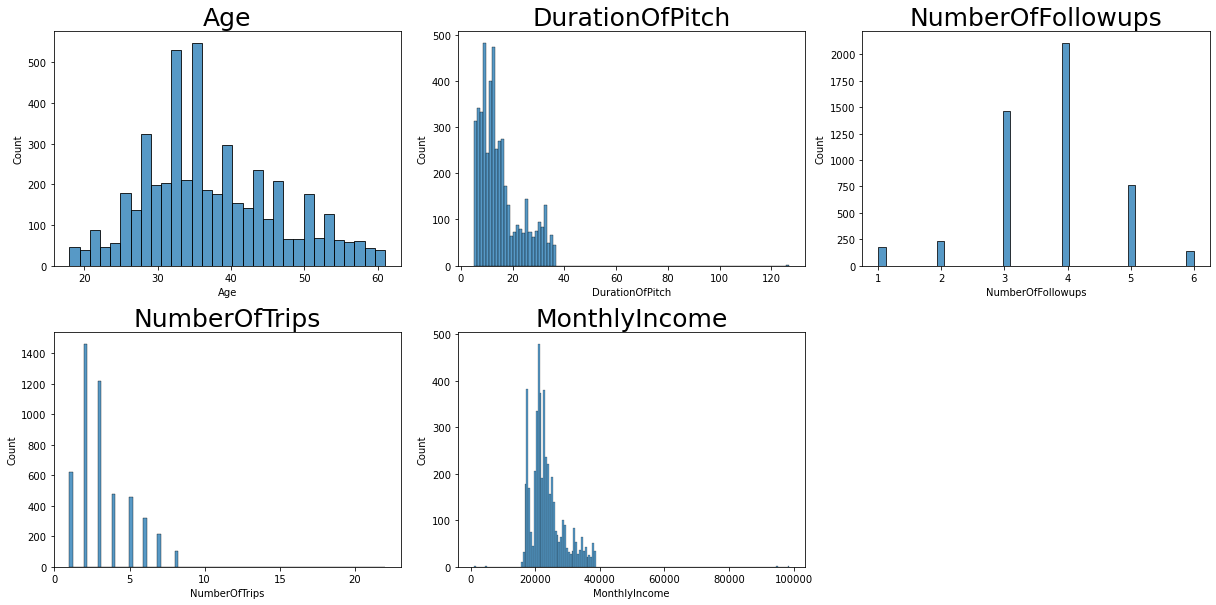

In [34]:
#Performing Univariate Analysis to study the central tendency and dispersion
#Plotting histogram to study distribution
Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=False)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

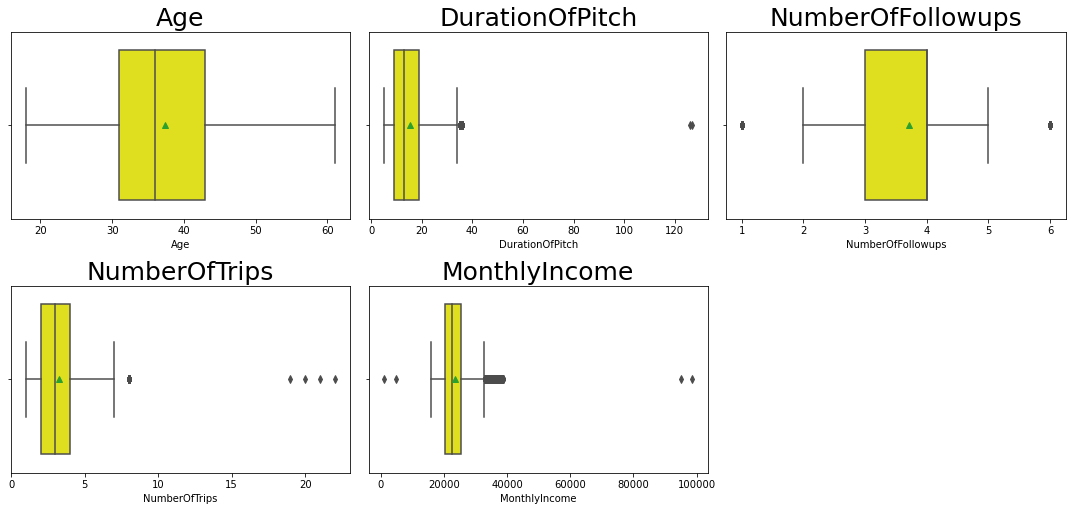

In [35]:
plt.figure(figsize=(15,35))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=25)

plt.show()

**Observations:**

* Age variable is almost normally distributed with no outliers. we see that most customers are in the age brackets 30- 45 yrs.
* DurationofPitch is slightly right-skewed. We see that most customer's pitch duration was under 20 mins. We also see few outliers at 40 mins and at 120+ mins. 
* The highest number of followups is 4.0 followed by 3.0. 
* NumberofTrips is right-skwed a little and majority of the customers seem to take atleast 3 trips per year. We also see very few outliers in the higher end
* MonthlyIncome is also right-skewd. However, we see that the majority of customers are between income bracket 20K dollars and 30K dollars. We also see two outliers in the low end and on the highest end. There are several outliers after the approx 35K dollars income level.


### Univariate Analysis - Categorical Columns:

In [36]:
categorical_val = df.select_dtypes(exclude=np.number).columns.tolist()

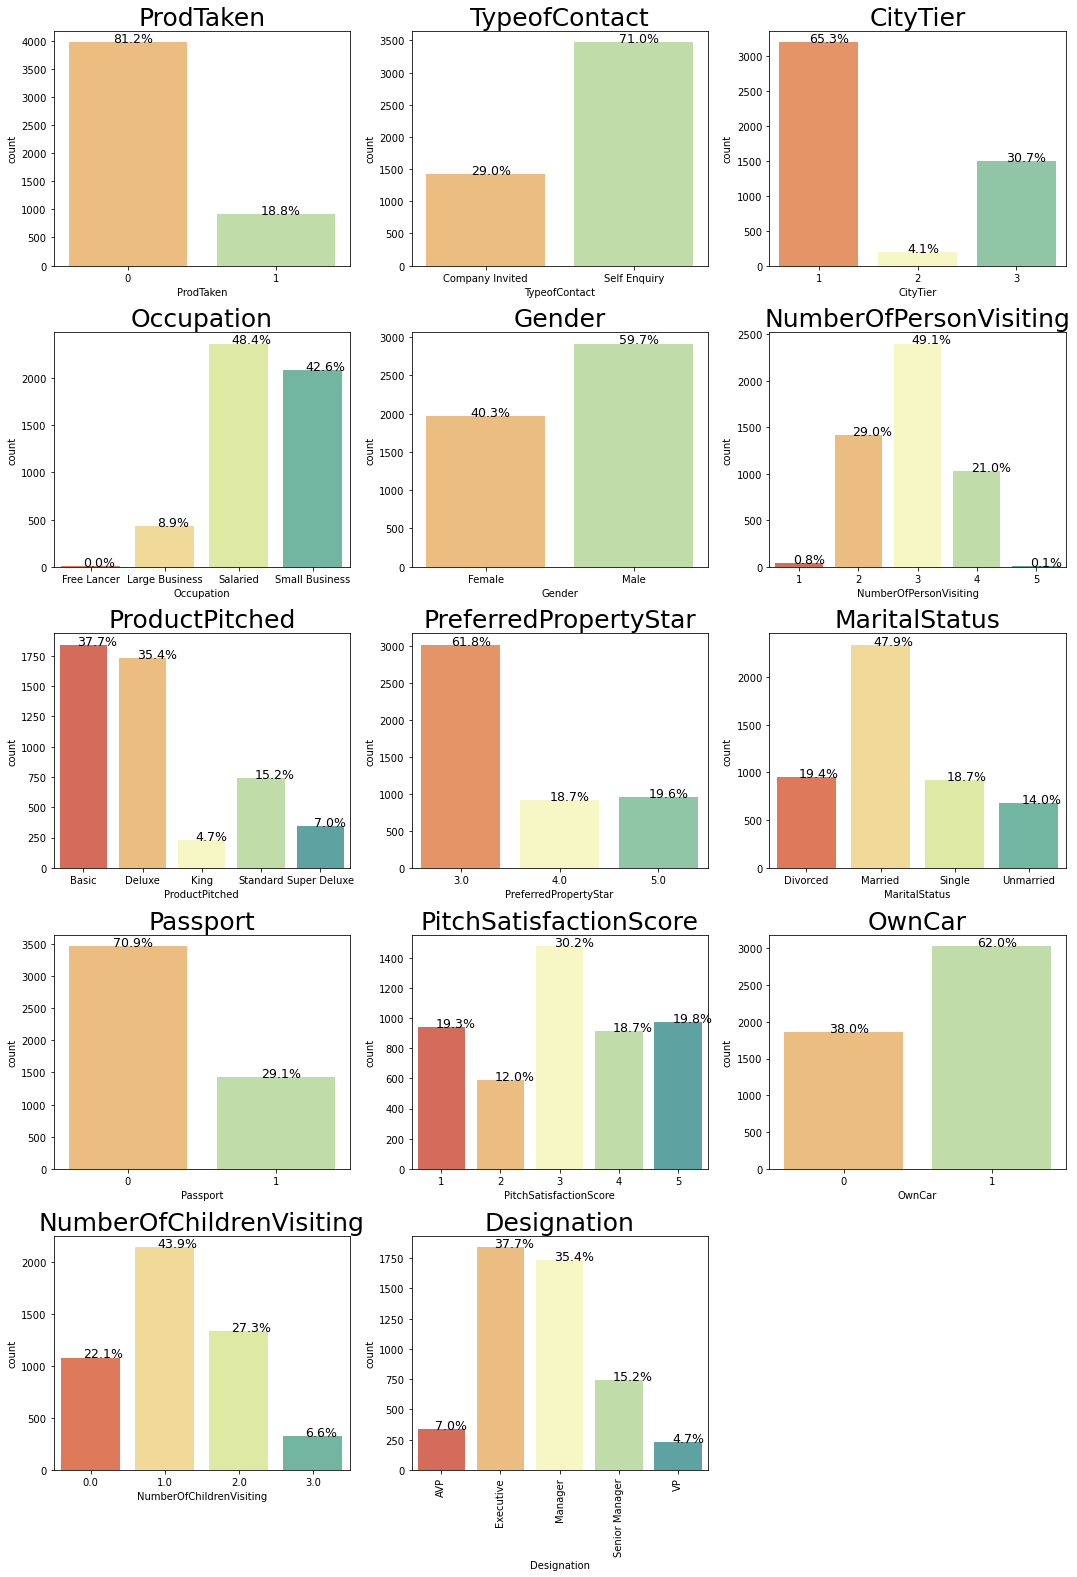

In [37]:
plt.figure(figsize=(15,75))
for i in range(len(categorical_val)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    ax=sns.countplot(df[categorical_val[i]],palette='Spectral')
    plt.tight_layout()
    plt.title(categorical_val[i],fontsize=25)
    total = len (df[categorical_val[i]])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2)-0.1  # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12.5,color='black') # To annonate
plt.xticks(rotation=90)
plt.show()

**Observations:**
* ProdTaken is the dependent variable. We that only 18.8% of the total customers purchased any of the travel package.The plot shows heavy imbalance in the dataset

* Self-Enquiry is the most preffered contact method by the customers at 71%

* 65.3% of customers are from Tier 1 cities and Tier3 cities comes second at 30.7%. 

* 48.4% of customers are Salaried, i.e work for an organization and customers with Small Business are the next highest in Occupation at 42.6%. 

* Male customers(59.7%) are higher than Female customers (40.3%)

* 49.1% of customers plan to take atleast 3 persons with them during trip. Around 29% customers want to take 2 people and 21% customers want to take 4 additional persons with them during their travel

* Basic(37.7%) and Deluxe(35.4%) are the most popular travel packages. The next slightly popular one is the Standard Travel package at 15.2%

* 61.8% customers prefer a three star hotel rating compared to four (18.7%) and five (19.6%) star rating hotels

* Married customers form the bulk of the data at 47.9% with Divorced (19.4%) and Single (18.7%) coming in close second and Unmarried(with partners) customers form 14% of the data

* Only 29.1% of customers have a passport and almost 62% of customers own a car

* Only 30.2% of customers rated the Sales Pitch with a score of 3. Even though 18.7% customers rated at 4 and 19.8% rated a pitch score of 5, we also see that 19.3% rated the Sales pitch score at 1. This shows a need for improvement in this area

* Around 43.9% of customers have atleast one child under age Five, planning to accompany them in the travels

* Executive (37.7%) and Manager(35.4%) are the highest Designations of the customers in the dataset

## Correlation Matrix

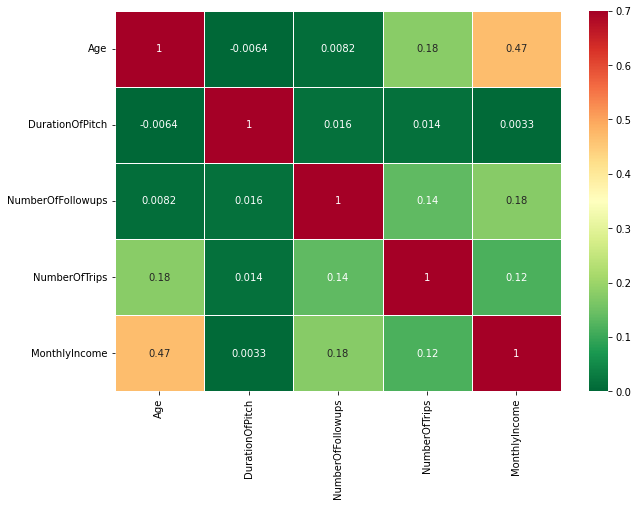

In [38]:
corr= df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=0.7, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

**Observations:**
* The correlation values are quite low between all the variables.
* Only Age and DurationofPitch have a very low negative correlation.
* MonthlyIncome and Age have the highest positive correlation at 0.47; i.e as Age increases, so does MontlyIncome
* NumberofFollowups and NumberofTrips have a  moderate positive correlation between them and also individually with Monthly Income.

## Bivariate Analysis:
* Let's analyse the dependent variable with all the numerical and categorical features and investigate possible relationships

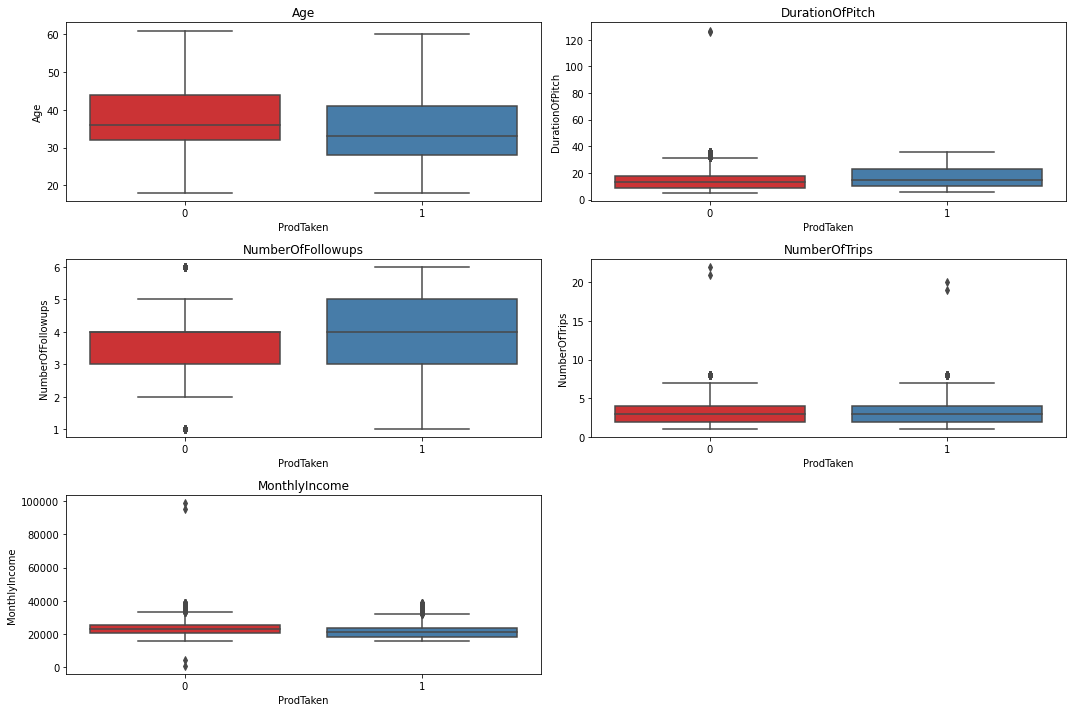

In [39]:
# For all numerical variables with Personal_Loan
plt.figure(figsize=(15,10))
for i, variable in enumerate(Uni_num):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df['ProdTaken'],df[variable],palette="Set1")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations:**
* The mean Age for customers who purchased any Product is slightly less than those who didnt. We also see that Age variable doesnt have any outliers. 
* The mean DurationofPitch for both classed of ProdTaken is almost equal. We see there are many outliers in Class '0' of ProdTaken, suggesting that longer pitch durations doesnt lead to product purchase.
* Interestingly, Customers who purchased the packages had an average of atleast four followups, compared to customers who didnt.
* The Averages for  NumberofTrips and MonthlyIncome;for both Classes of ProdTaken is almost equal. MonthlyIncome variable has several outliers in the higher end for both ProdTaken classes and very few in low end of Class '0'.


In [40]:
#Stacked plot of categorical variables with Personal Loans
def stacked_plot(x):
    sns.set(palette='Dark2')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


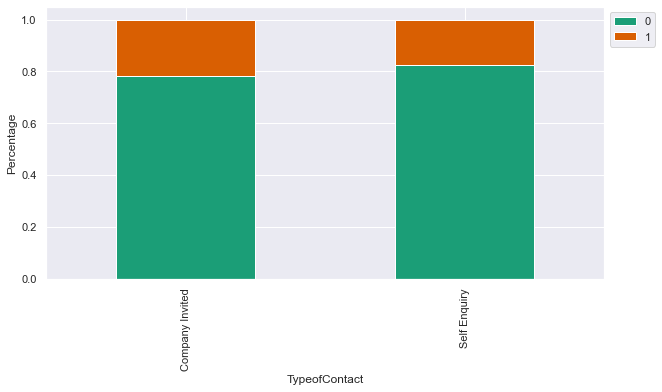

In [41]:
stacked_plot(df.TypeofContact)

* More Customers with CompanyInvited contact have bought Travel Packages

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


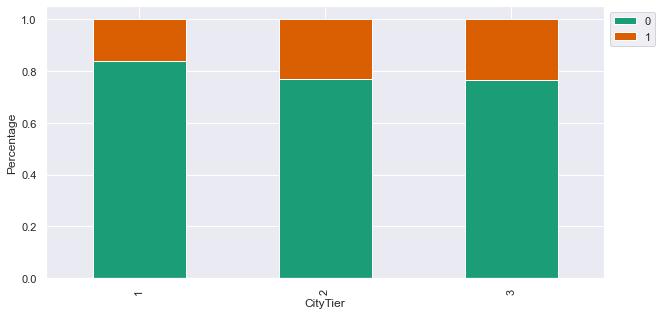

In [42]:
stacked_plot(df.CityTier)

* More Customers from Tier2 and Tier3 cities have purchased Travel Packages

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


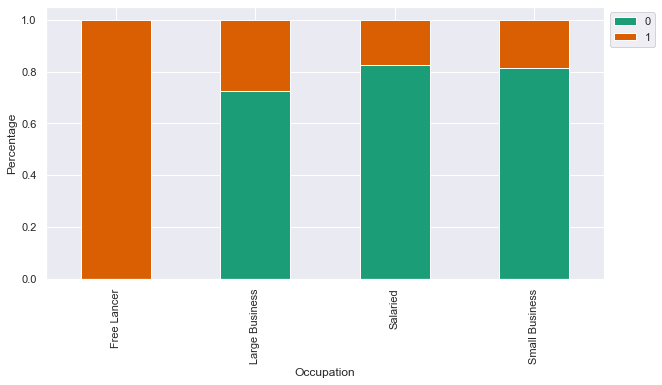

In [43]:
stacked_plot(df.Occupation)

* Though customers who are  Freelancers by Occupation have bought travel packages, the sample size is only two. 
* Of the 434 Large Business owning customers, almost 30% bought travel packages. 
* Among Salaried and Small Business owning customers,close to 20% have bought travel packages

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


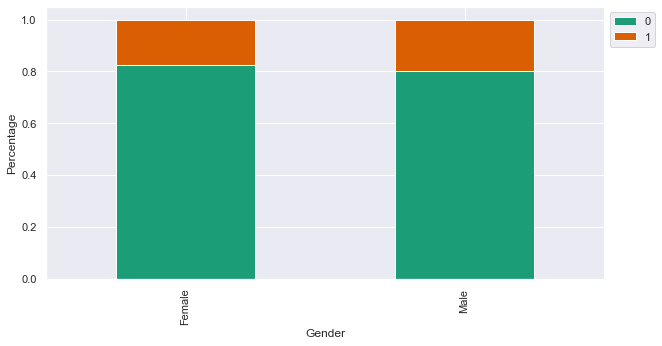

In [44]:
stacked_plot(df.Gender)

* Despite Male customers being significantly higher than Female customer, the percentage of those who bought travel packages is almost the same(or with minimum difference).  

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


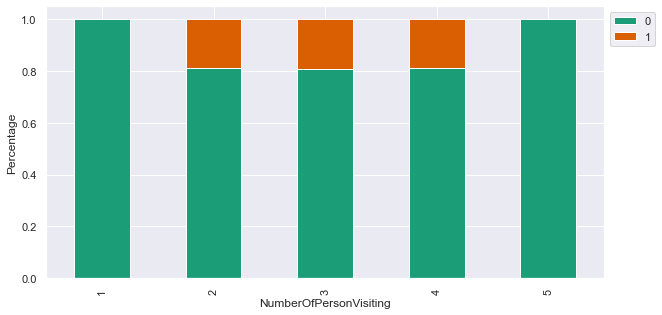

In [45]:
stacked_plot(df.NumberOfPersonVisiting)

* Among Customers who plan to take between 2-4 persons with them during travel, close to 20%  have bought a travel package product.
* Interestingly, we see that all Customers with one companion and five comapanions, did not purchase any product. 
* This suugests that the products dont seem either appealing or beneficial to the customers of the above two categories. This area needs further investigation

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


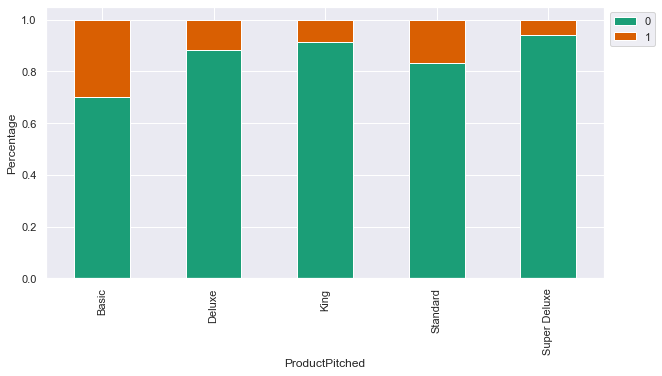

In [46]:
stacked_plot(df.ProductPitched)

* The Basic Package is the most preffered, with Standard and Deluxe following up.
* Comparitively very few customers purchased Super Deluxe products

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


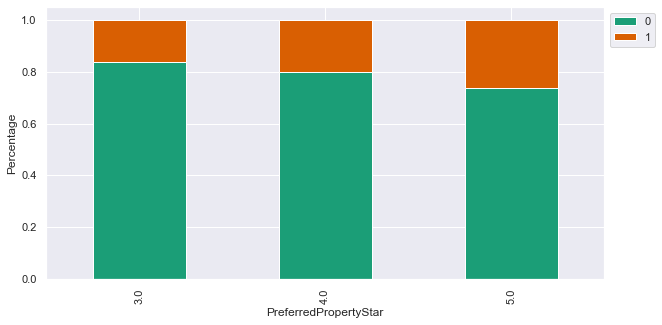

In [47]:
stacked_plot(df.PreferredPropertyStar)

* Though majority of customers prefer a 3.0 star rated Property, the percentage of customers purchasing the products is comparitively less than customers who prefer a 4.0 and 5.0 star rated property. 
* The higher the proprety star rating, higher the number of customers who purchased a product

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


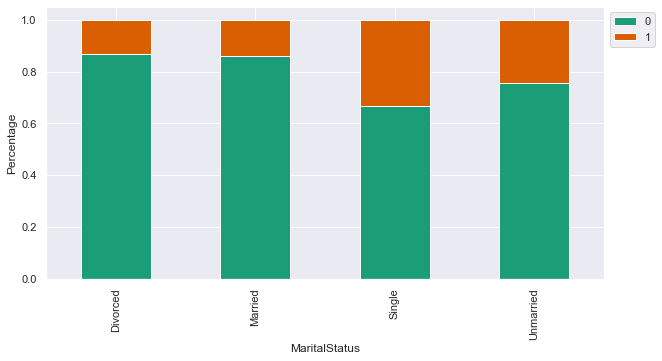

In [48]:
stacked_plot(df.MaritalStatus)

* Around 30% of all Single customers have bought a product and about 25% of Unmarried customers have also purchased a product
* Almost 50% of the total customers belong to the married category, but we see that only approx 15% of them have actually purchased any product. 

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


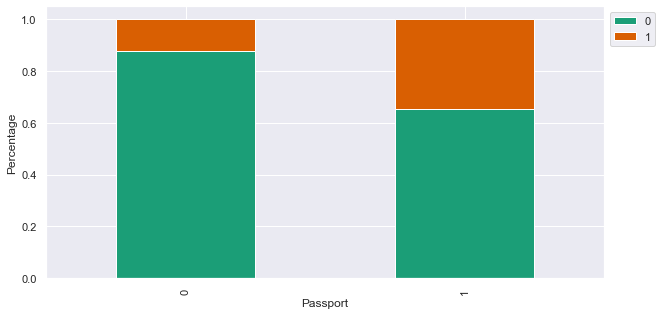

In [49]:
stacked_plot(df.Passport)

* More customers with passport tend to purchase products than those who dont.

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


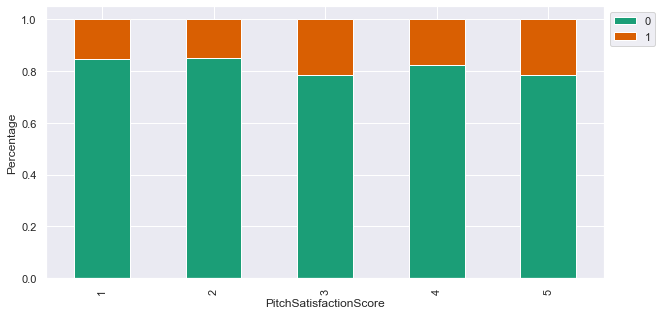

In [50]:
stacked_plot(df.PitchSatisfactionScore)

* Majority of customers have given a score of 3.0 to the Sale pitch for the products.
* But we observe that the number of customers who purchased any product is almost equal across all pitch scores. 
* This suggests that a high product pitch score doesnt guarantee purchase 

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


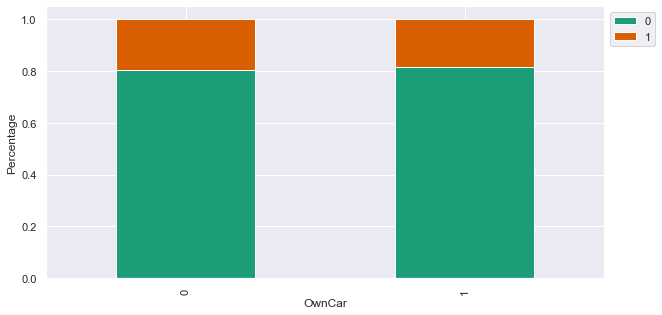

In [51]:
stacked_plot(df.OwnCar)

* The number of customers who bought a product is fairly equal across both classes of OwnCar

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        880  202  1082
1.0                       1747  399  2146
2.0                       1082  253  1335
3.0                        259   66   325
All                       3968  920  4888
------------------------------------------------------------------------------------------------------------------------


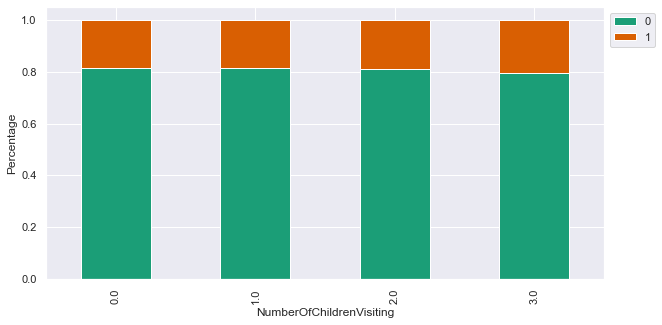

In [52]:
stacked_plot(df.NumberOfChildrenVisiting)

* We see that the percentage of customes who purchased a product is fairly same across all categories of variable NumberOfChildrenVisiting.

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


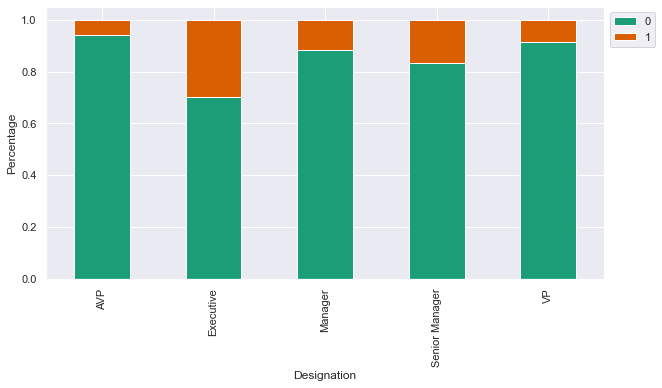

In [53]:
stacked_plot(df.Designation)

* Around  30% Customers with Executive Designation have purchased a product 
* Sr. Manager(16%) and Manager(~11%) Designation customers have purchased a product. 
* Very few customers of VP and AVP Designation have purchased a product. 

## Outliers Detection and Treatment : 

In [54]:
#Let's find the percentage of outliers using IQR

In [55]:
Q1 = data.quantile(0.25)             #To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                           #Inter Quantile Range (75th perentile - 25th percentile)

lower=Q1-1.5*IQR                        #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper=Q3+1.5*IQR

In [56]:
outlier_num = df.select_dtypes(include=np.number)

In [57]:
((outlier_num<lower)|(outlier_num>upper)).sum()/len(df)*100

Age                  0.000000
DurationOfPitch      2.291326
NumberOfFollowups    6.382979
NumberOfTrips        2.229951
MonthlyIncome        7.671849
dtype: float64

* MonthlyIncome and NumberofFollowups have high outliers compared to the other features.
* However, we will not be treating outliers, as we will be building Decision Tree based models and Decision Tree models are not influenced by Outliers.
* Furthermore, in real case scenario, we will encounter similar outliers and that would require the model to investigate if there is any pattern among the customers

# Model Building:

## Model Evaluation Criterion

### Model can make two kinds of wrong predictions:

1. Predicting that the customer will purchase a Travel Package when they dont. - False Positive
2. Predicting that the customer will not purchase a Travel Package when they do. - False Negative

* The Travel company's objectives are :
    - Make Marketing Expenditure more efficient;i.e target potential customers who have higher chances of buying a product.
    - Predict and Identify all potential customers who will purchase the newly introduced travel package.

### Metric for Optimization:
* For the above objective, its important that both False positive and False negative values are low. Hence we would want the F1-Score to be maximized.
* The greater the F1-Score, greater the chances of predicting both classes correctly.

### Creating a Confusion Matrix

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    sns.set(font_scale=2.0) # to set font size for the matrix
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
#Defining a function to calculate all the metric scores for the model
def scores(model,flag=True):
    """ model : classifier to predict X values """
    score_list=[] # creating an empty list to store the accuracy and f1(metric of interst)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_acc = metrics.accuracy_score(y_train,y_pred_train)
    test_acc = metrics.accuracy_score(y_test,y_pred_test)
    
    train_f1 = metrics.f1_score(y_train,y_pred_train)
    test_f1 = metrics.f1_score(y_test,y_pred_test)
    score_list.extend((train_acc,test_acc,train_f1,test_f1))
    
    if flag== True:
        print("Accuracy on training set : ",metrics.accuracy_score(y_train,y_pred_train))
        print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

        print("\nRecall on training set : ",metrics.recall_score(y_train,y_pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
        print("\nPrecision on training set : ",metrics.precision_score(y_train,y_pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
        print("\nF1 on training set : ",metrics.f1_score(y_train,y_pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,y_pred_test))
    elif flag == False:
        return score_list #return this when flag is False
    

**We want to predict the customers who will purchase the newly introduced travel package. Hence the Customer Interaction Data for the previous existing travel packages will not add any information to the models. So we will be dropping them for further model building and analysis process.**

### Splitting Data into Train and Test set:

In [60]:
X= df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
y= df['ProdTaken']

In [61]:
X = pd.get_dummies(X, drop_first=True)
# Splitting data into training and test set:
X_train,X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=25,stratify=y)
print(X_train.shape,X_test.shape)

(3421, 28) (1467, 28)


**The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

In [62]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [63]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

### Building the Model:
* We will start with a Decision Tree model
* Next, we will build two ensemble models - Bagging Classifier and Random Forest Classifier
* Then, we will build three Boosting ensemble models - ADABoost, GradientBoost and XG Boost
* We will first build them with their default parameters and later hypertune them for optimization.
* We will also calculate all four metrics; Accuracy, Recall, Precision and F1Score which is the metric of interest
* F1Score is the weighted average of Precision and Recall. Its takes both False positives and False negatives into account.

**Decision Tree **

* Due to class imbalance in the dependent variable, we will add class_weight hyperparameter to give more importance to class 1
* We will keep the same randomstate = 25 for all the models so that the same random values are chosen

In [64]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=25)

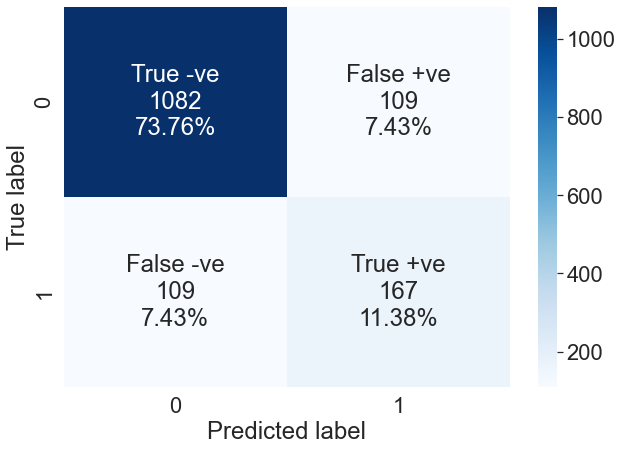

In [65]:
Dt.fit(X_train, y_train) #fit the train set to Decision tree
y_predict = Dt.predict(X_test) 
make_confusion_matrix(y_test,y_predict) #calculate confusion matrix

In [66]:
scores(Dt) #calculate the metric scores

Accuracy on training set :  1.0
Accuracy on test set :  0.8513974096796183

Recall on training set :  1.0
Recall on test set :  0.605072463768116

Precision on training set :  1.0
Precision on test set :  0.605072463768116

F1 on training set :  1.0
F1 on test set :  0.605072463768116


* The Decision Tree model seems to be overfitting in the train set. 
* The F1Score for test set is 0.60

**Bagging Classifier:**


In [67]:
bagging = BaggingClassifier(random_state=25) #defining the classifier with randomstate 25
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=25)

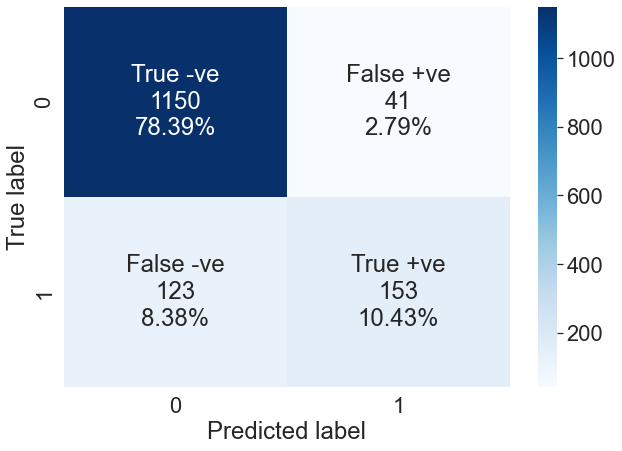

In [68]:
y_predict = bagging.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [69]:
scores(bagging)

Accuracy on training set :  0.9900613855597779
Accuracy on test set :  0.8882072256305386

Recall on training set :  0.953416149068323
Recall on test set :  0.5543478260869565

Precision on training set :  0.9935275080906149
Precision on test set :  0.788659793814433

F1 on training set :  0.9730586370839935
F1 on test set :  0.6510638297872341


* The Bagging classifier has a better accuracy metric and the F1 score is also higher.
* But this model only predicts 10.43% of the total 13% of True positives; ie customers who have purchased a product.

**Bagging Classifier with weighted decision tree**

In [70]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=25),random_state=25)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.15,
                                                                      1: 0.85},
                                                        random_state=25),
                  random_state=25)

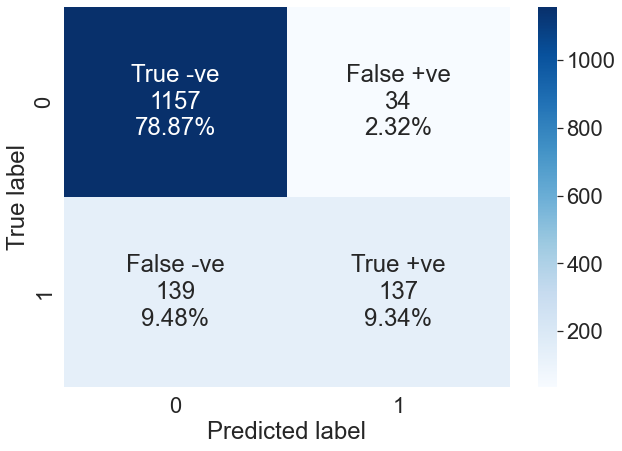

In [71]:
y_predict = bagging_wt.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [72]:
scores(bagging_wt)

Accuracy on training set :  0.9903536977491961
Accuracy on test set :  0.8820722563053851

Recall on training set :  0.9503105590062112
Recall on test set :  0.4963768115942029

Precision on training set :  0.99836867862969
Precision on test set :  0.8011695906432749

F1 on training set :  0.9737470167064439
F1 on test set :  0.6129753914988815


* There isnt any improvement in the metrics with the weighted Bagging classifier

**Random Forest Classifier**

In [73]:
random_forest = RandomForestClassifier(random_state=25)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=25)

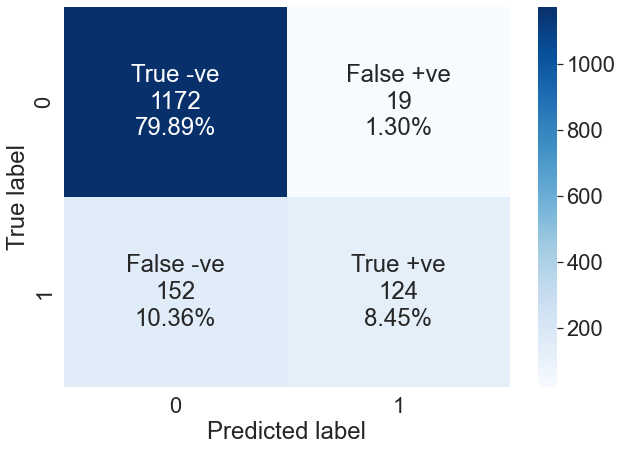

In [74]:
y_predict = random_forest.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [75]:
scores(random_forest)

Accuracy on training set :  1.0
Accuracy on test set :  0.8834355828220859

Recall on training set :  1.0
Recall on test set :  0.4492753623188406

Precision on training set :  1.0
Precision on test set :  0.8671328671328671

F1 on training set :  1.0
F1 on test set :  0.5918854415274463


* Random Forest classifier is also overfitting for the training set and the F1 score metric has also reduced.

**Random Forest Classifier with weights**

In [76]:
random_forest_wt = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=25)
random_forest_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=25)

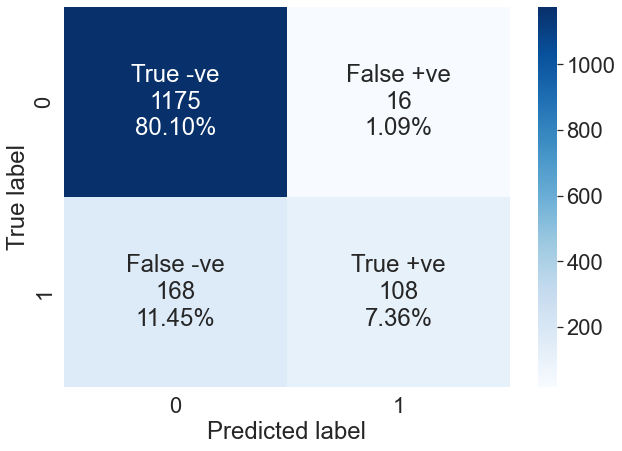

In [77]:
y_predict = random_forest_wt.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [78]:
scores(random_forest_wt)

Accuracy on training set :  1.0
Accuracy on test set :  0.874573960463531

Recall on training set :  1.0
Recall on test set :  0.391304347826087

Precision on training set :  1.0
Precision on test set :  0.8709677419354839

F1 on training set :  1.0
F1 on test set :  0.54


* There is no improvement in the metrics for the weighted Random Forest classifier.


#### GridSearch for Hyperparameter Tuning of the models:

* Hyperparameters are variables that control the network structure of the Decision tree.
* As there is no direct way to calculate the effects of value change in hyperparamter has on the model, we will use a GridSearch
* This is a tuning technique that will compute the optimum values of specific hyperparamters of the model
* The parameters are optimized using a cross-validated GridSearch over a parameter grid

**Hyperparameters for Decision Tree Model**

In [79]:
# Choose the type of classifier. 
DTclassifier = DecisionTreeClassifier(random_state=25,class_weight = {0:.15,1:.85}) #adding classweights 

#Defining the Hyperparameters

parameters = {'max_depth': np.arange(10,60,10), 
            'criterion': ['gini','entropy'],
            'min_samples_leaf': [ 2, 5, 7, 10],
            'max_leaf_nodes' : [3, 5, 10,15],}

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search with the above parameters
grid_obj = GridSearchCV(DTclassifier, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the best combination of parameters
classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=15, min_samples_leaf=2,
                       random_state=25)

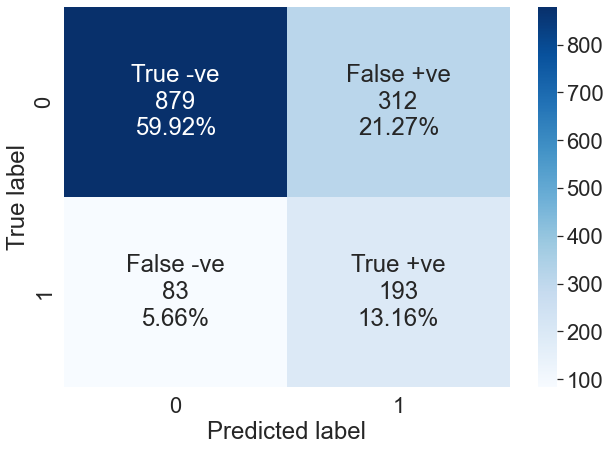

In [80]:
y_predict = classifier.predict(X_test) 
make_confusion_matrix(y_test,y_predict) 

In [81]:
scores(classifier)

Accuracy on training set :  0.7380882782812044
Accuracy on test set :  0.7307430129516019

Recall on training set :  0.7391304347826086
Recall on test set :  0.6992753623188406

Precision on training set :  0.3953488372093023
Precision on test set :  0.3821782178217822

F1 on training set :  0.5151515151515151
F1 on test set :  0.4942381562099872


* The F1Score has decreased to 0.51 for Train set and 0.49 for test set. However, the performance values for F1Score are close and comparable.


**Hyperparameters for Bagging Classifier**

In [82]:
# grid search for bagging classifier
parameters = {
              'n_estimators':np.arange(10,60,10),
              'max_features': [0.7,0.8,0.9],
              'max_samples': [0.7,0.8,0.9], 
             }

#Assigning Bootstrap = True to select features with Replacement
bagging_tuned = BaggingClassifier(random_state=25,bootstrap=True)

# Type of scoring used to compare parameter combinations
F1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=F1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=25)

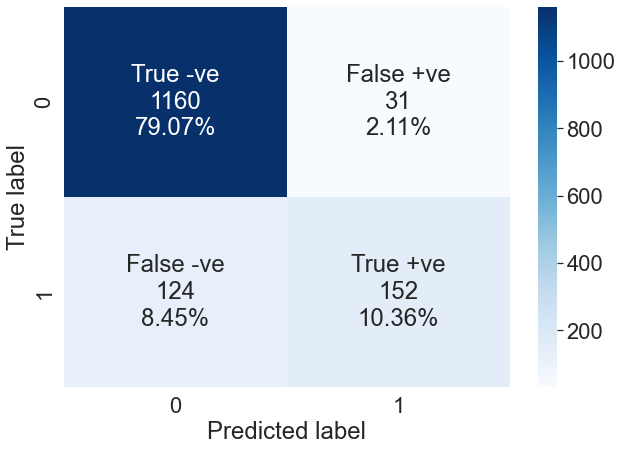

In [83]:
y_predict = bagging_estimator_tuned.predict(X_test)
make_confusion_matrix(y_test,y_predict)

In [84]:
scores(bagging_estimator_tuned)

Accuracy on training set :  0.9991230634317451
Accuracy on test set :  0.8943421949556919

Recall on training set :  0.9953416149068323
Recall on test set :  0.5507246376811594

Precision on training set :  1.0
Precision on test set :  0.8306010928961749

F1 on training set :  0.9976653696498053
F1 on test set :  0.6623093681917211


In [86]:
# defining list of models
all_models = [Dt, classifier,bagging,bagging_estimator_tuned,random_forest]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy and F1 Score
for model in all_models:
    j = scores(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    f1_train.append(j[2])
    f1_test.append(j[3])

In [88]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier','Tuned Bagging Classifier ',
                                          'Random Forest'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_F1-Score,Test_F1-Score
3,Tuned Bagging Classifier,0.999123,0.894342,0.997665,0.662309
2,Bagging Classifier,0.990061,0.888207,0.973059,0.651064
0,Decision Tree,1.000000,0.851397,1.000000,0.605072
4,Random Forest,1.000000,0.883436,1.000000,0.591885
1,Tuned Decision Tree,0.738088,0.730743,0.515152,0.494238


In [91]:
import pickle


In [92]:
filename = 'finalized_model.sav'
pickle.dump(random_forest, open(filename, 'wb'))

In [95]:
loaded_model = pickle.load(open(filename, 'rb'))


In [99]:
y_predict2 = loaded_model.predict(X_test)


In [100]:
y_predict2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)